### Imports

In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook
%matplotlib inline

In [2]:
# Computational packages
import numpy as np
import matplotlib.pyplot as plt
import torch
import tqdm
plt.style.use('../bioAI.mplstyle')

# General packages
import datetime
import sys
import os

# custom packages
import ratsimulator
from ratsimulator.Environment import Rectangle
import spatial_maps as sm # CINPLA spatial maps

# avoid adding multiple relave paths to sys.path
sys.path.append("../src") if "../src" not in sys.path else None 
from PlaceCells import PlaceCells
from Models import SorscherRNN
from Experiment import Experiment
from methods import *
from datahandling import *
from Plots import *
from plotting_functions import *

### Setup Experiment

In [3]:
base_path = "/mnt/WD12TB-HDD"
names = ['gg-default', 'gg-3ME', 'gg-10ME', 'gg-50ME']
experiments = []
for name in names:
    experiment = Experiment(name, base_path = base_path)
    experiment.setup()
    experiments.append(experiment)

Experiment <gg-default> already EXISTS. Loading experiment settings!
Loading experiment details
This experiment has ALREADY been setup - SKIPPING.
Experiment <gg-3ME> already EXISTS. Loading experiment settings!
Loading experiment details
This experiment has ALREADY been setup - SKIPPING.
Experiment <gg-10ME> already EXISTS. Loading experiment settings!
Loading experiment details
This experiment has ALREADY been setup - SKIPPING.
Experiment <gg-50ME> already EXISTS. Loading experiment settings!
Loading experiment details
This experiment has ALREADY been setup - SKIPPING.


In [4]:
loggers = []
for experiment in experiments:
    with open(experiment.paths["experiment"] / "logger.pkl", "rb") as f:
        logger = pickle.load(f)
    loggers.append(logger)

In [5]:
panesize = set_size(width=345, mode='wide')
panesize

(4.77376504773765, 2.9503490538081323)

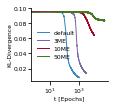

In [6]:
figsize=(panesize[0]/3, panesize[1]/2)
fig, ax = plt.subplots(figsize=figsize)
for logger,experiment in zip(loggers, experiments):
    ax.plot(logger.training_metrics['familiar']['KL'],label=experiment.name.split('-')[-1])

ax.set_ylabel('KL-Divergence')
ax.set_xlabel('t [Epochs]')
ax.set_xscale('log')
ax.legend()

fig.savefig(experiments[0].paths['experiment'] / f'plots/generalisation-KL')

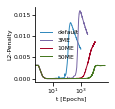

In [7]:
fig, ax = plt.subplots(figsize=figsize)
for logger,experiment in zip(loggers, experiments):
    ax.plot(logger.training_metrics['familiar']['l2_reg'][2:],label=experiment.name.split('-')[-1])

ax.set_ylabel('L2-Penalty')
ax.set_xlabel('t [Epochs]')
ax.set_xscale('log')
ax.legend()

fig.savefig(experiments[0].paths['experiment'] / f'plots/generalisation-l2')

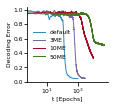

In [8]:
fig, ax = plt.subplots(figsize=figsize)
for logger,experiment in zip(loggers, experiments):
    ax.plot(logger.training_metrics['familiar']['pred_error'],label=experiment.name.split('-')[-1])

ax.set_ylabel('Decoding Error')
ax.set_xlabel('t [Epochs]')
ax.set_xscale('log')
ax.legend()

fig.savefig(experiments[0].paths['experiment'] / f'plots/generalisation-decoding')

In [9]:
# load grid scores for each experiment
grid_scoress = []
for experiment in experiments:
    path = experiment.paths['grid_scores']
    with open(path / filenames(path)[0], "rb") as f:
        grid_scoress.append(pickle.load(f))

In [10]:
# load ratemaps at final training step for each experiment
# and get the highest grid-scored ratemap
ratemapss = []
for i, experiment in enumerate(experiments):
    path = experiment.paths['ratemaps'] / 'env_0'
    with open(path / filenames(path)[-1], "rb") as f:
        ratemapss.append(pickle.load(f)[np.argsort(grid_scoress[i])[::-1]])#[1])

In [11]:
"""
start_idx = 0
num_ratemaps = 64
model_id = 3
fig, ax = multiimshow(ratemapss[model_id][start_idx:start_idx+num_ratemaps])
"""

'\nstart_idx = 0\nnum_ratemaps = 64\nmodel_id = 3\nfig, ax = multiimshow(ratemapss[model_id][start_idx:start_idx+num_ratemaps])\n'

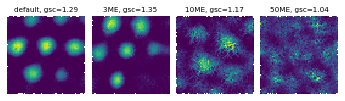

In [12]:
figsize=(panesize[0], panesize[1]/2)
fig, axs = plt.subplots(ncols=4,figsize=figsize)
ratemap_idxs = [20,1,5,13]
[axs[i].imshow(ratemapss[i][ratemap_idxs[i]]) for i in range(len(axs))]
[axs[i].set_title(f"{experiments[i].name.split('-')[-1]}, gsc={np.around(grid_scoress[i][np.argsort(grid_scoress[i])[::-1][ratemap_idxs[i]]],2)}") for i in range(len(axs))]
[axis_off_labels_on(ax) for ax in axs]

fig.savefig(experiments[0].paths['experiment'] / f'plots/generalisation-ratemaps')